LIMPIEZA DE DATOS PROYECTO BI

Incluir paquetes

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.impute import SimpleImputer

Cargar data

In [40]:
data = pd.read_csv('./Data/NoProcesada/Relacional/profesor_corrupto.csv', sep=';', quotechar='"')

MUESTRA DE DATOS

In [16]:
data.head()

,id_profesor,sueldo_profesor,id_persona
0,1,6054354.0,987
1,2,6879126.0,5824
2,3,4123957.0,4060
3,4,4170182.0,869
4,5,4068153.0,5224


Verificar estructura

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_profesor      2000 non-null   object 
 1   sueldo_profesor  1993 non-null   float64
 2   id_persona       2000 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 47.0+ KB


Valores nulos

In [19]:
print(f"Nombre columnas {data.columns}")
print(data.isnull().sum())

Nombre columnas Index(['id_profesor', 'sueldo_profesor', 'id_persona'], dtype='object')
id_profesor        0
sueldo_profesor    7
id_persona         0
dtype: int64


In [20]:
data.describe()

,sueldo_profesor,id_persona
count,1.993000e+03,2000.000000
mean,4.664635e+06,5101.667000
std,1.917842e+06,2903.190334
min,0.000000e+00,4.000000
25%,3.032034e+06,2581.500000
50%,4.600691e+06,5244.500000
75%,6.347532e+06,7577.500000
max,7.996950e+06,9996.000000


Visualizar el tamaño del dataset

In [22]:
data.shape

(2000, 3)

Cambiar tipos de datos

In [42]:
data['id_profesor'] = pd.to_numeric(data['id_profesor'], errors='coerce')
data = data.dropna(subset=["id_profesor"])

data["id_profesor"] = data["id_profesor"].astype("int64")
print("Valores nulos después de limpiar id_profesor:")
print(data["id_profesor"].isnull().sum())

Valores nulos después de limpiar id_profesor:
0


OUTLIERS - Modo Grafico

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18388\2956398687.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col], errors='ignore')


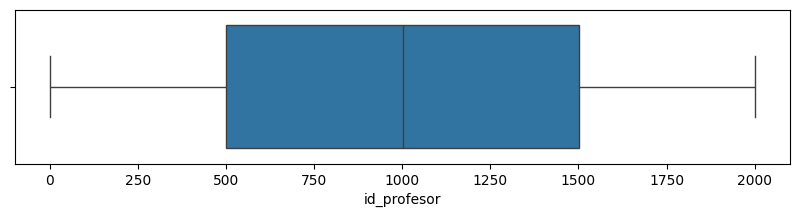

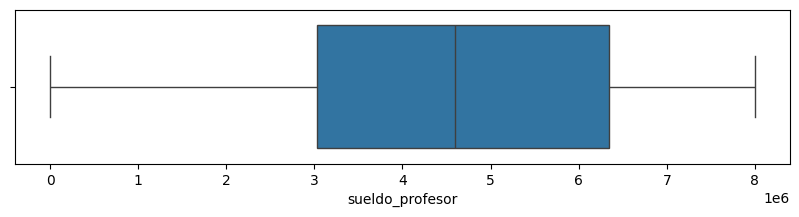

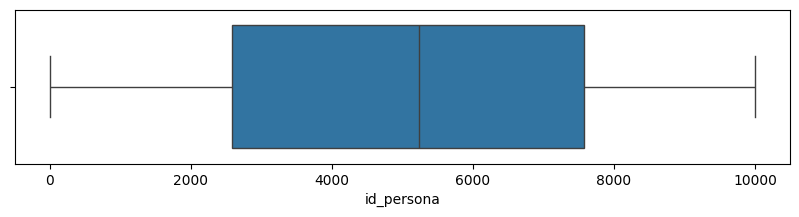

In [43]:
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='ignore')
    
cols=data.select_dtypes(include=['number']).columns

for col in cols:
    plt.figure(figsize=(10,2))
    sns.boxplot(data=data[cols], x=col)

OUTLIERS - Calculado

IRQ = Rango Intercuartirico

In [44]:
outliers={}

for col in cols:
  Q1 = np.percentile(data[col], 25)
  Q3 = np.percentile(data[col], 75)
  IRQ = Q3 - Q1
  LI = Q1 - 1.5 * IRQ
  LS = Q3 + 1.5 * IRQ
  outliers[col] = data[(data[col] < LI) | (data[col] > LS)][col]

  print(f'{col}: {len(outliers[col])} outliers')
print(outliers)

id_profesor: 0 outliers
sueldo_profesor: 0 outliers
id_persona: 0 outliers
{'id_profesor': Series([], Name: id_profesor, dtype: int64), 'sueldo_profesor': Series([], Name: sueldo_profesor, dtype: float64), 'id_persona': Series([], Name: id_persona, dtype: int64)}


In [23]:
data.mean
data.std

<bound method DataFrame.std of      id_profesor  sueldo_profesor  id_persona
0              1        6054354.0         987
1              2        6879126.0        5824
2              3        4123957.0        4060
3              4        4170182.0         869
4              5        4068153.0        5224
...          ...              ...         ...
1995        1996        4502226.0        9227
1996        1997        4054356.0        4589
1997        1998        2230953.0        7560
1998        1999        2237348.0         622
1999        2000        3858465.0         401

[2000 rows x 3 columns]>

<Axes: xlabel='sueldo_profesor', ylabel='Count'>

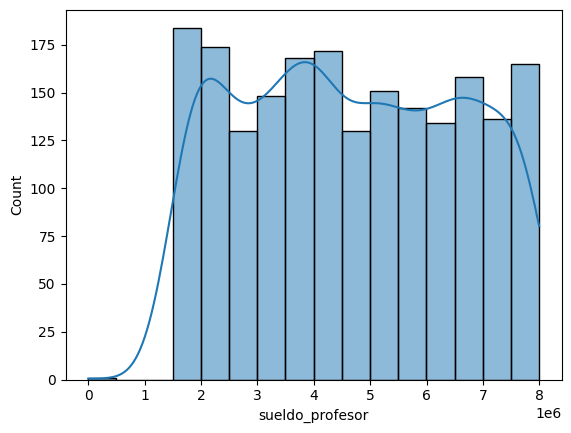

In [24]:
sns.histplot(data=data, x='sueldo_profesor', kde=True)

In [25]:
# data.isna().sum()
# isna, traer valores nulos
data.isna().mean()*100

id_profesor        0.00
sueldo_profesor    0.35
id_persona         0.00
dtype: float64

Eliminar valores nulos

In [26]:
#axis   1 columna,  0 fila
data.drop('id_profesor', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sueldo_profesor  1993 non-null   float64
 1   id_persona       2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


Imputar datos